Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Dataset/Train/")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Dataset/Test/")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

tf.Tensor([8 4 5 5 3 2 5 0 1 5 7 4 0 4 7 3 3 5 1 5 3 1 1 1 0 1 5 4 2 7 4 1], shape=(32,), dtype=int32)
tf.Tensor([4 6 3 4 4 5 4 0 6 6 3 1 4 8 5 1 5 5 1 5 4 5 6 0 5 4 4 5 5 4 4 5], shape=(32,), dtype=int32)


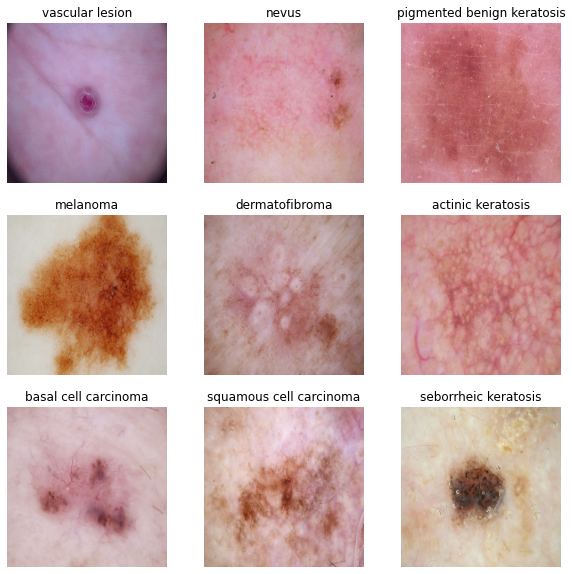

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
n=0
labels_taken=[]
for images, labels in train_ds.take(2):
  print(labels)
  for i in range(32):
    if (labels[i] not in labels_taken):
      ax = plt.subplot(3,3,n+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")
      n+=1
      labels_taken.append(labels[i])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 455s 214ms/step - loss: 2.0654 - accuracy: 0.1995 - val_loss: 2.5741 - val_accuracy: 0.1739
Epoch 2/20
56/56 [==============================] - 1s 19ms/step - loss: 1.8864 - accuracy: 0.3227 - val_loss: 2.2624 - val_accuracy: 0.2609
Epoch 3/20
56/56 [==============================] - 1s 19ms/step - loss: 1.5698 - accuracy: 0.4461 - val_loss: 3.1186 - val_accuracy: 0.1304
Epoch 4/20
56/56 [==============================] - 1s 19ms/step - loss: 1.4024 - accuracy: 0.5132 - val_loss: 2.4177 - val_accuracy: 0.2609
Epoch 5/20
56/56 [==============================] - 1s 19ms/step - loss: 1.2457 - accuracy: 0.5517 - val_loss: 2.2819 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1894 - accuracy: 0.5775 - val_loss: 2.7846 - val_accuracy: 0.1739
Epoch 7/20
56/56 [==============================] - 1s 19ms/step - loss: 1.0764 - accuracy: 0.6322 - val_loss: 2.6670 - val_accuracy: 0.2174
Epoch 8/20

### Visualizing training results

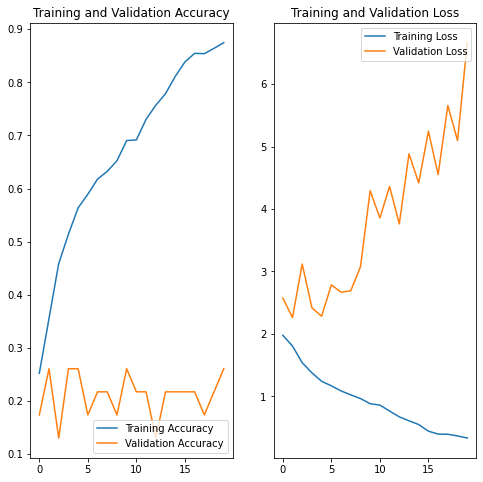

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

##### Ans: Theres a clear sign of overfitting happening here. Train accuracy is at 90% where valication accuracy is only at 30%

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

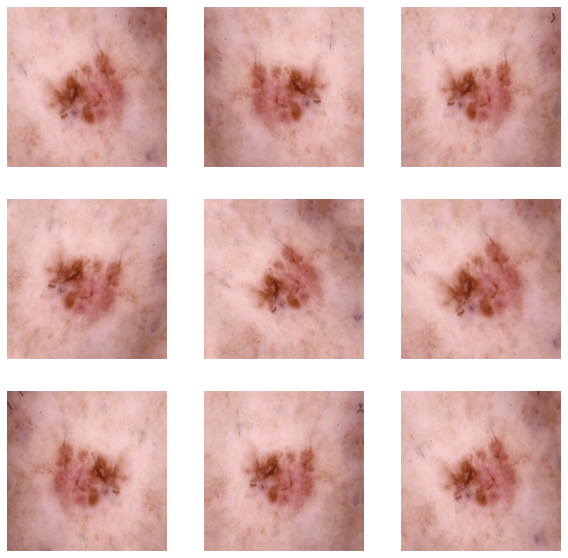

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model1 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])



### Compiling the model

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 27ms/step - loss: 2.0310 - accuracy: 0.2385 - val_loss: 2.5526 - val_accuracy: 0.3043
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6029 - accuracy: 0.4557 - val_loss: 2.3384 - val_accuracy: 0.3043
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4486 - accuracy: 0.5060 - val_loss: 2.1683 - val_accuracy: 0.3043
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3722 - accuracy: 0.5298 - val_loss: 1.9633 - val_accuracy: 0.2609
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3123 - accuracy: 0.5429 - val_loss: 1.9997 - val_accuracy: 0.3043
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2836 - accuracy: 0.5472 - val_loss: 2.4157 - val_accuracy: 0.3043
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3701 - accuracy: 0.5268 - val_loss: 2.8602 - val_accuracy: 0.3043
Epoch 8/20
56

### Visualizing the results

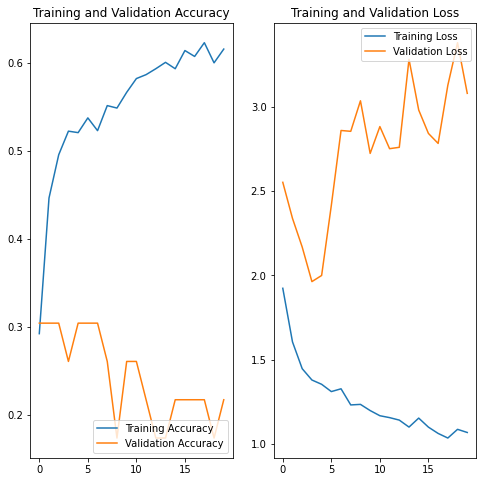

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Theres no imporvement in terms on model accuracy, train accuracy has come down to 60% where validation accuracy is still very low.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
def create_dataset_distribution(img_folder):
  class_count = []
  class_name=[]
  for dir1 in os.listdir(img_folder):
    number_of_images_in_subfolder = len(os.listdir(os.path.join(img_folder, dir1)))
    class_name.append(dir1)
    class_count.append(number_of_images_in_subfolder)
  return tuple(zip(class_name, class_count))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


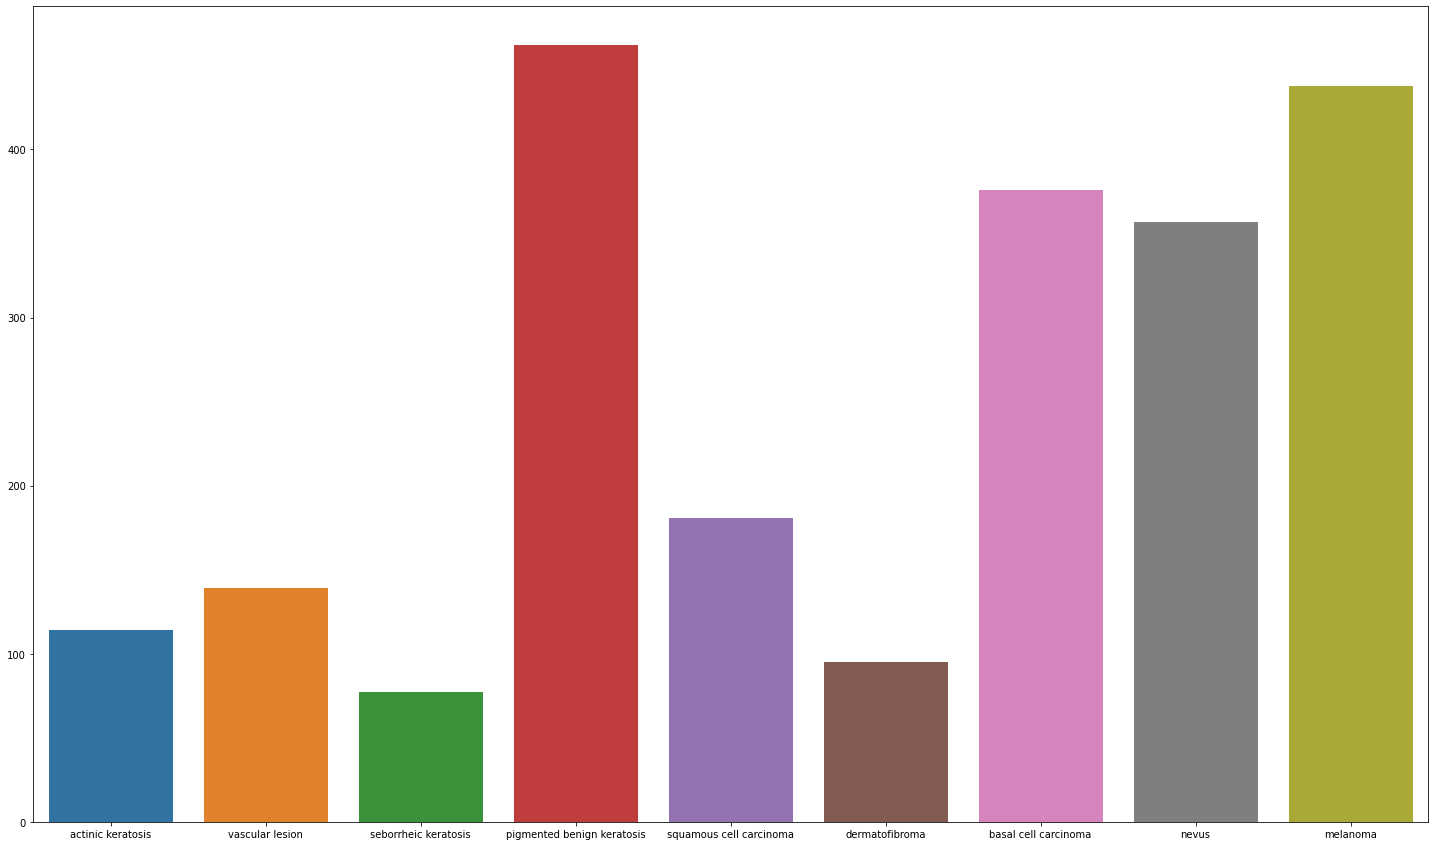

In [ ]:
# drawing the distribution
import seaborn as sns
class_distribution = create_dataset_distribution(data_dir_train)
labels = [x[0] for x in class_distribution]
label_counts = [x[1] for x in class_distribution]
plt.figure(figsize=(25,15))
sns.barplot(labels, label_counts)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?
#### - pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/My Drive/CNN_assignment/Dataset/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC921FB8E10>: 100%|██████████| 500/500 [00:20<00:00, 24.98 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC95DB2EF10>: 100%|██████████| 500/500 [00:19<00:00, 26.17 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC95C013D50>: 100%|██████████| 500/500 [00:20<00:00, 24.79 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC921F85CD0>: 100%|██████████| 500/500 [01:39<00:00,  5.03 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7FC966A0FB90>: 100%|██████████| 500/500 [01:18<00:00,  6.40 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC921F27990>: 100%|██████████| 500/500 [00:19<00:00, 25.75 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FC921EC7590>: 100%|██████████| 500/500 [00:42<00:00, 11.89 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC921FC8250>:   0%|          | 1/500 [00:00<01:26,  5.79 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC921FE9550>: 100%|██████████| 500/500 [00:19<00:00, 25.17 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_assignment/Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC96623AD50>: 100%|██████████| 500/500 [00:20<00:00, 24.32 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0:4]

['/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033811.jpg_5ac95e92-dec7-4f0a-82f3-86261a4ad406.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028820.jpg_350034f9-6461-4c29-ab57-b0a350f7d389.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026709.jpg_3aa24270-eb91-4222-ad9a-bb55cc809e03.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026702.jpg_0013d9f8-ed94-4ea8-9118-294986204633.jpg']

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0:4]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
1,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
2,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
3,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
4,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
...,...,...
4495,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma
4496,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma
4497,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma
4498,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma


In [ ]:
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_original[0:4]

['/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/ISIC_0026729.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/ISIC_0026468.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/ISIC_0029830.jpg',
 '/content/gdrive/My Drive/CNN_assignment/Dataset/Train/actinic keratosis/ISIC_0026040.jpg']

In [ ]:
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_original[0:4]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [ ]:
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))

In [ ]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
1,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
2,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
3,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
4,/content/gdrive/My Drive/CNN_assignment/Datase...,actinic keratosis
...,...,...
2234,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma
2235,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma
2236,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma
2237,/content/gdrive/My Drive/CNN_assignment/Datase...,melanoma


In [ ]:
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train=pathlib.Path("/content/gdrive/My Drive/CNN_assignment/Dataset/Train/")
train_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds_aug = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, activation='relu',input_shape=(180, 180, 3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model2.fit(
  train_ds_aug,
  validation_data=val_ds_aug,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 47s 264ms/step - loss: 2.5132 - accuracy: 0.1442 - val_loss: 1.8099 - val_accuracy: 0.3289
Epoch 2/50
169/169 [==============================] - 41s 234ms/step - loss: 1.6959 - accuracy: 0.3569 - val_loss: 1.5024 - val_accuracy: 0.4625
Epoch 3/50
169/169 [==============================] - 40s 232ms/step - loss: 1.4297 - accuracy: 0.4717 - val_loss: 1.3886 - val_accuracy: 0.5004
Epoch 4/50
169/169 [==============================] - 40s 230ms/step - loss: 1.3003 - accuracy: 0.5137 - val_loss: 1.3355 - val_accuracy: 0.4974
Epoch 5/50
169/169 [==============================] - 40s 232ms/step - loss: 1.2034 - accuracy: 0.5519 - val_loss: 1.1537 - val_accuracy: 0.5924
Epoch 6/50
169/169 [==============================] - 40s 229ms/step - loss: 1.1038 - accuracy: 0.6034 - val_loss: 1.0734 - val_accuracy: 0.6140
Epoch 7/50
169/169 [==============================] - 40s 230ms/step - loss: 1.0045 - accuracy: 0.6306 - val_loss: 1.1641 - val_ac

#### **Todo:**  Visualize the model results

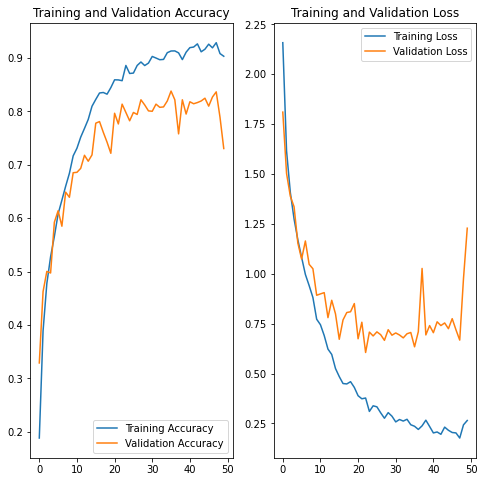

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Yes we did get rid of overfitting by adding more samples to our dataset. Class rebalance did help.